To open and run this notebook in your browser with Google Colab, use this link:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/causalincentives/pycid/blob/master/notebooks/fairness.ipynb)

In [1]:
# helpful extensions
%load_ext autoreload
%autoreload 2
%matplotlib inline
%autosave 60
# importing necessary libraries
try:
    import pycid
except ModuleNotFoundError:
    import sys
    !{sys.executable} -m pip install pycid
    import pycid

import numpy as np

Autosaving every 60 seconds


In [2]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

Let's first create a CID where there is an introduced total effect.

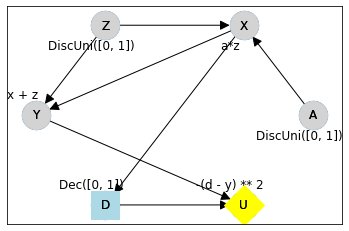

In [3]:
cid = pycid.CID([
    ('A', 'X'),  # defining the graph's nodes and edges
    ('Z', 'X'),
    ('Z', 'Y'),
    ('X', 'D'),
    ('X', 'Y'),
    ('D', 'U'),
    ('Y', 'U')
],
    decisions=['D'],
    utilities=['U'])

cpd_A = pycid.UniformRandomCPD('A', [0, 1])
cpd_Z = pycid.UniformRandomCPD('Z', [0, 1])
cpd_X = pycid.FunctionCPD('X', lambda a, z: a*z)
cpd_D = pycid.DecisionDomain('D', [0, 1])
cpd_Y = pycid.FunctionCPD('Y', lambda x, z: x + z)
cpd_U = pycid.FunctionCPD('U', lambda d, y: -(d - y) ** 2)

cid.add_cpds(cpd_A, cpd_D, cpd_Z, cpd_X, cpd_Y, cpd_U)

cid.draw()

In [4]:
cid.impute_conditional_expectation_decision('D', 'Y')
cid.expected_utility({})  # should be -0.1666

-0.16666666666666669

In [5]:
pycid.introduced_total_effect(cid, 'A', 'D', 'Y', 0, 1)

0.3333333333333335

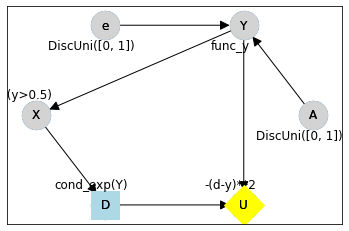

In [6]:
cid = pycid.CID([
    ('A', 'Y'),  # defining the graph's nodes and edges
    ('e', 'Y'),
    ('Y', 'X'),
    ('X', 'D'),
    ('D', 'U'),
    ('Y', 'U')],
    decisions=['D'],
    utilities=['U'])

def func_y(a, e):
    if a==0 and e==0:
        return 0
    elif a==0 and e==1:
        return 0.75
    elif a==1 and e==0:
        return 0
    else:
        return 1

cpd_e = pycid.UniformRandomCPD('e', [0, 1])
cpd_A = pycid.UniformRandomCPD('A', [0, 1])
cpd_Y = pycid.FunctionCPD('Y', func_y)
cpd_X = pycid.FunctionCPD('X', lambda y: int(y>0.5))
cpd_D = pycid.DecisionDomain('D', [0, 1])

cpd_U = pycid.FunctionCPD('U', lambda d, y: -(d-y)**2)

cid.add_cpds(cpd_A, cpd_D, cpd_e, cpd_X, cpd_Y, cpd_U)
cid.impute_conditional_expectation_decision('D', 'Y')

cid.draw()

In [7]:
pycid.introduced_total_effect(cid, 'A', 'D', 'Y', 0, 1)

-0.125